<!DOCTYPE html>
<html>
<body >
<div style="background-color:powderblue;">
<h1 style ="color:#00008b">Whatsapp Chat Analyzer</h1>
</div>
</body>
</html>

# Things to be analyzed

<!DOCTYPE html>
<html>
<body>

<h2 style ="color:blue">Contact-wise statistics:</h2>

<ul>
  <li>Number of messages per contact</li>
  <li>Number of words per contact </li>
  <li>Number of average words per message per contact</li>
  <li>Number of emojis per contact</li>
  <li>Number of emojis per contact</li>
  <li>NUmber of media per contact</li>
  <li>NUmber of keywords per contact</li>
</ul>  

</body>
</html>


<!DOCTYPE html>
<html>
<body>

<h2 style ="color:blue">TIme-wise statistics:</h2>

<ul>
  <li>Number of messages per hour</li>
  <li>Number of messages per weekday</li>
  <li>Number of messages per month</li>
  <li>Number of messages per year</li>
</ul>  

</body>
</html>

<!DOCTYPE html>
<html>
    <body>
        <hr size="30" noshade>
    </body>
</html>

In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%config IPCompleter.use_jedi = False


In [3]:
#Getting the dataset for processing it

df=pd.read_csv('WhatsApp-Chat-with-Datascience_testing.csv')
df.columns = ["Column"]


df

,Column
0,"23/06/2021, 15:20 - You created group ""Datasci..."
1,"23/06/2021, 15:20 - Pappa left"
2,"23/06/2021, 15:21 - Rudviq: PureTextWithoutAny..."
3,"23/06/2021, 15:21 - Rudviq: Text with the spaces"
4,"23/06/2021, 15:22 - Rudviq: 😂"
5,"23/06/2021, 15:22 - Rudviq: 😂🥳"
6,"23/06/2021, 15:22 - Rudviq: 😂🥳🎂"
7,"23/06/2021, 15:22 - Rudviq: Text with the emoj..."
8,"23/06/2021, 15:22 - Rudviq: <Media omitted>"
9,"23/06/2021, 15:23 - Rudviq: <Media omitted>"


## Spliting the text in the csv file into  different columns

In [4]:

#1 Splitting Date and rest of the columns

split_col=df.iloc[:,0].str.split(', ',expand=True)
df["Date"]=split_col[0]
df["Temp_col"]= split_col[1]

#OR
#df.columns = ['Date','Temp_col']

df.drop(columns=['Column'],inplace = True)


#2 Splitting Time and the other column

split_col =df["Temp_col"].str.split(' - ',expand=True)
df["Time"]= split_col[0]
df["Temp_col"]=split_col[1]

#3 Splitting user and chats columns
split_col = df["Temp_col"].str.split(': ',expand =True)
df["Users"]= split_col[0]
df["Whatsapp Chats"]=split_col[1]


df.drop(columns=["Temp_col"],inplace=True)
df

,Date,Time,Users,Whatsapp Chats
0,23/06/2021,15:20,"You created group ""Datascience_testing""",None
1,23/06/2021,15:20,Pappa left,None
2,23/06/2021,15:21,Rudviq,PureTextWithoutAnySpaces
3,23/06/2021,15:21,Rudviq,Text with the spaces
4,23/06/2021,15:22,Rudviq,😂
5,23/06/2021,15:22,Rudviq,😂🥳
6,23/06/2021,15:22,Rudviq,😂🥳🎂
7,23/06/2021,15:22,Rudviq,Text with the emojis 😂💯🤩
8,23/06/2021,15:22,Rudviq,<Media omitted>
9,23/06/2021,15:23,Rudviq,<Media omitted>


## Creating two DataFrames - with media and without media

In [5]:
df_wo_media = df[df["Whatsapp Chats"].str.contains(r'Image omitted')==False]
df_wo_media = df[df["Whatsapp Chats"].str.contains(r'video omitted')==False]
df_wo_media = df[df["Whatsapp Chats"].str.contains(r'GIF omitted')==False]
df_wo_media = df[df["Whatsapp Chats"].str.contains(r'<Media omitted>')==False]

# df_wo_media.reset_index(drop=True)
df

,Date,Time,Users,Whatsapp Chats
0,23/06/2021,15:20,"You created group ""Datascience_testing""",None
1,23/06/2021,15:20,Pappa left,None
2,23/06/2021,15:21,Rudviq,PureTextWithoutAnySpaces
3,23/06/2021,15:21,Rudviq,Text with the spaces
4,23/06/2021,15:22,Rudviq,😂
5,23/06/2021,15:22,Rudviq,😂🥳
6,23/06/2021,15:22,Rudviq,😂🥳🎂
7,23/06/2021,15:22,Rudviq,Text with the emojis 😂💯🤩
8,23/06/2021,15:22,Rudviq,<Media omitted>
9,23/06/2021,15:23,Rudviq,<Media omitted>


## Dropping Nan values from the dataframes

In [6]:
df=df.dropna()
df_wo_media=df_wo_media.dropna()

df = df.reset_index(drop=True)
df_wo_media=df_wo_media.reset_index(drop=True)
df

,Date,Time,Users,Whatsapp Chats
0,23/06/2021,15:21,Rudviq,PureTextWithoutAnySpaces
1,23/06/2021,15:21,Rudviq,Text with the spaces
2,23/06/2021,15:22,Rudviq,😂
3,23/06/2021,15:22,Rudviq,😂🥳
4,23/06/2021,15:22,Rudviq,😂🥳🎂
5,23/06/2021,15:22,Rudviq,Text with the emojis 😂💯🤩
6,23/06/2021,15:22,Rudviq,<Media omitted>
7,23/06/2021,15:23,Rudviq,<Media omitted>
8,23/06/2021,15:23,Rudviq,<Media omitted>
9,23/06/2021,15:23,Rudviq,<Media omitted>


## Function to plot the bar graph

In [7]:
def plotGraph(y_pos,y,title):
    fig,ax = plt.subplots()


    y_pos = np.arange(len(user_list))
   
    ax.barh(y_pos,y,align = 'center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(user_list)
    # ax.set_xticks(y)
    ax.set_title(title)
    ax.invert_yaxis()
    

## Creating an User array

In [8]:
user_list = df["Users"].unique()
user_list

array(['Rudviq'], dtype=object)

In [9]:

#Messages per user (including media)

chats_per_person=[]
most_msg_by_user = []
for i in range(len(user_list)):
    temp = df["Whatsapp Chats"][df["Users"]==user_list[i]]
    temp = temp.reset_index(drop =True)
    most_msg_by_user.append(temp.shape[0])
    for j in range(1,len(temp)):
        temp[0] += ' ' + temp[j]
    chats_per_person.append(temp[0])
    del temp
        
#Messages per user (excluding media)
chats_per_person_wo=[]
most_msg_by_user_wo = []
for i in range(len(user_list)):
    temp = df_wo_media["Whatsapp Chats"][df_wo_media["Users"]==user_list[i]]
    temp = temp.reset_index(drop =True)
    most_msg_by_user_wo.append(temp.shape[0])
    for j in range(1,len(temp)):
        temp[0] += ' ' + temp[j]
    chats_per_person_wo.append(temp[0])
    del temp
    
most_msg_by_user

[14]

## Bar graph  to represent most messages per user

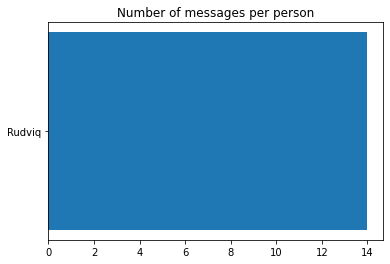

In [10]:
fig,ax = plt.subplots()


y_pos = np.arange(len(user_list))

ax.barh(y_pos,most_msg_by_user,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(user_list)
# ax.set_xticks(y)
ax.set_title("Number of messages per person")
ax.invert_yaxis()


In [11]:
# most_msg_by_user
# chats_per_person

##  Mostly used words by each user

In [12]:
from scipy.stats import itemfreq

In [13]:
#Message frequency without media files

for i in range(len(user_list)):
    fg = itemfreq(list(chats_per_person_wo)[i].split(' '))
    fg = fg[fg[:,1].astype(float).argsort()][::-1]
    print(user_list[i],fg[1:4])

Rudviq [['the' '3']
 ['special' '2']
 ['to' '2']]


/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  after removing the cwd from sys.path.


## Number of letters per user

In [14]:
import regex as re

In [15]:


only_text = re.sub(r'[^a-zA-Z0-9]',r'',chats_per_person_wo[0])
# only_text
# chats_per_person_wo
tot_no_text =[]
for i in range(len(user_list)):
    only_text = re.sub(r'[^a-zA-Z0-9]',r'',chats_per_person_wo[i])
    tot_no_text.append(len(only_text))

tot_no_text

[224]

## Bar graph to represent Number of texts by each user

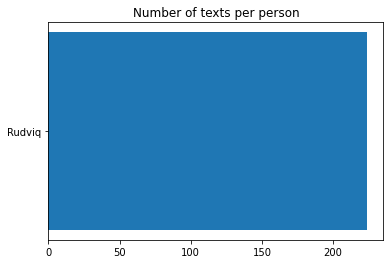

In [16]:
fig,ax = plt.subplots()


y_pos = np.arange(len(user_list))

ax.barh(y_pos,tot_no_text,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(user_list)
# ax.set_xticks(y)
ax.set_title("Number of texts per person")
ax.invert_yaxis()


## Number of emojis used per person

In [17]:
import emoji

no_of_emoji=[]
emojis_iter = map(lambda y: y, emoji.UNICODE_EMOJI['en'].keys())
regex_set = re.compile('|'.join(re.escape(em) for em in emojis_iter))

for i in range(len(user_list)):
    new_list = regex_set.findall(chats_per_person_wo[i]) 
    no_of_emoji.append(len(new_list))

# no_of_emoji

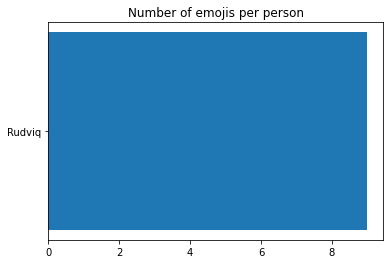

In [18]:
fig,ax = plt.subplots()


y_pos = np.arange(len(user_list))

ax.barh(y_pos,no_of_emoji,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(user_list)
# ax.set_xticks(y)
ax.set_title("Number of emojis per person")
ax.invert_yaxis()


## Number of words per user

In [19]:
no_of_words = []
for i in range(len(user_list)):
    N= chats_per_person_wo[i].split(' ')
    no_of_words.append(len(N))
    
no_of_words    
N

['PureTextWithoutAnySpaces',
 'Text',
 'with',
 'the',
 'spaces',
 '😂',
 '😂\U0001f973',
 '😂\U0001f973🎂',
 'Text',
 'with',
 'the',
 'emojis',
 '😂💯\U0001f929',
 'Few',
 'media',
 'files',
 'A',
 'sentence',
 'with',
 'punctuations;',
 'to',
 'check',
 'whether',
 'code',
 'consider',
 'the',
 'special',
 'character',
 'as',
 'an',
 'emoji',
 'or',
 'not.',
 'More',
 'eg.',
 'with',
 'special',
 'symbol.....is',
 'it',
 'rlly',
 'necessary',
 'to',
 'do',
 'this??',
 'You',
 'deleted',
 'this',
 'message']

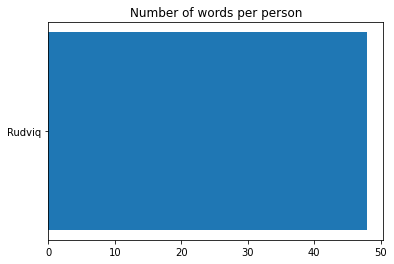

In [20]:
fig,ax = plt.subplots()


y_pos = np.arange(len(user_list))

ax.barh(y_pos,no_of_words,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(user_list)
# ax.set_xticks(y)
ax.set_title("Number of words per person")
ax.invert_yaxis()


In [21]:
# len(df[df["Whatsapp Chats"].str.contains(r'<Media omitted>')==True][df["Users"]==user_list[2]])

## Number of media files sent per user

In [22]:
no_of_media = []

for i in range(len(user_list)):
    l=len(df[df["Whatsapp Chats"].str.contains(r'<Media omitted>')==True][df["Users"]==user_list[i]])
    no_of_media.append(l)
    
no_of_media

/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


[4]

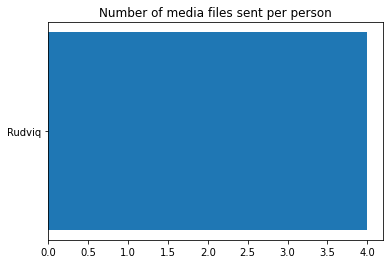

In [23]:
fig,ax = plt.subplots()


y_pos = np.arange(len(user_list))

ax.barh(y_pos,no_of_media,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(user_list)
# ax.set_xticks(y)
ax.set_title("Number of media files sent per person")
ax.invert_yaxis()


## Average number of words per message per contact

In [24]:
#Avg no of words per message per contact including media

avg_words = []
for i in range(len(user_list)):
    avg_words.append(no_of_words[i]/most_msg_by_user_wo[i])
    

avg_words

[4.8]

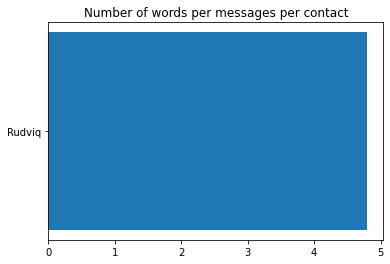

In [25]:
fig,ax = plt.subplots()


y_pos = np.arange(len(user_list))

ax.barh(y_pos,avg_words,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(user_list)
# ax.set_xticks(y)
ax.set_title("Number of words per messages per contact")
ax.invert_yaxis()


In [26]:
tot_no_text =[]
for i in range(len(user_list)):
    only_text = re.sub(r'[^a-zA-Z0-9_ ]',r' ',chats_per_person[i])
    tot_no_text.append(len(only_text))
    
l=only_text.split(' ')
only_text

while("" in l):
    l.remove("")
len(l)
l

['PureTextWithoutAnySpaces',
 'Text',
 'with',
 'the',
 'spaces',
 'Text',
 'with',
 'the',
 'emojis',
 'Media',
 'omitted',
 'Media',
 'omitted',
 'Media',
 'omitted',
 'Media',
 'omitted',
 'Few',
 'media',
 'files',
 'A',
 'sentence',
 'with',
 'punctuations',
 'to',
 'check',
 'whether',
 'code',
 'consider',
 'the',
 'special',
 'character',
 'as',
 'an',
 'emoji',
 'or',
 'not',
 'More',
 'eg',
 'with',
 'special',
 'symbol',
 'is',
 'it',
 'rlly',
 'necessary',
 'to',
 'do',
 'this',
 'You',
 'deleted',
 'this',
 'message']

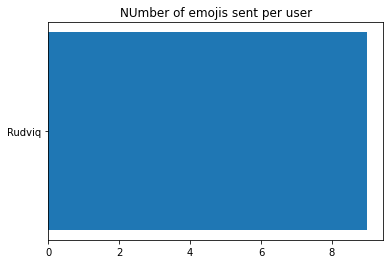

In [28]:
#Graph to plot NUmber of emojis sent

plotGraph(user_list,no_of_emoji,'NUmber of emojis sent per user')    